Detected text: 220
Img height47
width 122
First character: 2
  Data ['2', '0', '0', '60', '46', '0']
    Adjusted for OpenCV: (0, 46), (60, 0)
2nd character: 2
 -- Data ['2', '59', '26', '66', '31', '0']
 -- Adjusted for OpenCV -  (59, 20),  (66, 15)
3rd character: 0
    Data ['2', '59', '26', '66', '31', '0']
    Adjusted for OpenCV -  (64, 32),  (100, 17)
Final image with updated text:


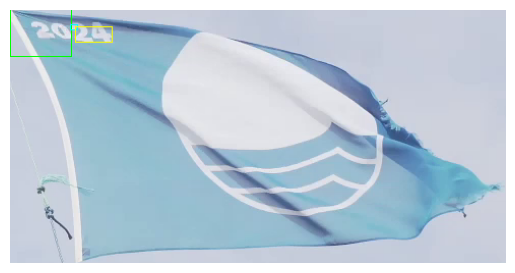

In [70]:
# Augmentation / Analysis - OCR ON Flag Year Tests - Viewing the boundary boxes for detected text characters 
# This now just to visualise the bounding boxes of text characters 
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = r"D:/FlagDetectionDatasets/a_pSDS/new/croppedflag.png"
image = cv2.imread(image_path)
original_copy = image.copy()

# Get initial dimensions
height, width = image.shape[:2]
cropped_height = height // 5
cropped_width = width // 4

# Initialize variables
text_found = False
updated_image = None
replacement_text = "2028"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
thickness = 2

# Replacement text size
text_size = cv2.getTextSize(replacement_text, font, font_scale, thickness)
text_width, text_height = text_size[0]

# Loop to progressively trim rows if no text is detected
while cropped_height > 0:
    cropped_img = image[:cropped_height, :cropped_width].copy()
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # Apply threshold and Gaussian blur
    _, thresh = cv2.threshold(gray, 200, 180, cv2.THRESH_BINARY_INV)
    blurred = cv2.GaussianBlur(thresh, (5, 5), 0)

    # Perform OCR
    custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789'
    text = pytesseract.image_to_string(blurred, config=custom_config).strip()

    if text:
        text_found = True
        print(f"Detected text: {text}")
        # Detect bounding boxes
        boxes = pytesseract.image_to_boxes(blurred, config=custom_config)
        h, w = blurred.shape
        # Reference of Tiseracrt points LEFTx bottom y right x, top y  
        #<character>: The detected character (e.g., a digit or letter).
        #<x1>: The left X-coordinate of the bounding box (in pixels).
        #<y1>: The bottom Y-coordinate of the bounding box (in pixels).
        #<x2>: The right X-coordinate of the bounding box (in pixels).
        #<y2>: The top Y-coordinate of the bounding box (in pixels).
        #<page>: ... 
        # Get the first character's bounding box
        #After adjustment:
        #x1_adjusted = 50 + 1920 // 2 = 50 + 960 = 1010
        first_char_box1 = boxes.splitlines()[0].split()
        char1 = first_char_box[0]  # The char
        print(f"Img height{h}")
        print(f"width {w}")
        # Extract the first character bounding box
        first_char_box = boxes.splitlines()[0].split() # Split the first line
        x1_first_char = int(first_char_box[1])         # Left X-coordinate
        #y1_first_char = int(first_char_box[2])     # Bottom Y-coordinate 
        y1_first_char = h - 1 - int(first_char_box[2])     # Bottom Y-coordinate (OpenCV)
        x2_first_char = int(first_char_box[3])         # Right X-coordinate
        #y2_first_char = int(first_char_box[4])     # Top Y-coordinate 
        y2_first_char = h - 1 - int(first_char_box[4])     # Top Y-coordinate (OpenCV)
        
        # 1st char box ['2', '0', '0', '60', '46', '0']
        #x1_first_char: Left edge of the first character.
        #y1_first_char: Bottom edge of the first character (adjusted for OpenCV coordinates).
        #x2_first_char: Right edge of the first character.
        #y2_first_char: Top edge of the first character (adjusted for OpenCV coordinates).

        # Get the 2nd character's bounding box
        second_char_box = boxes.splitlines()[1].split()
        char2 = second_char_box[0]  # The char
        x1_char2 = int(second_char_box[1])  # Left X-coordinate
        #y1_char2 = int(second_char_box[2])  # Bottom Y-coordinate -----------
        y1_char2 = h - 1 - int(second_char_box[2])  # Bottom Y-coordinate (OpenCV)
        x2_char2 = int(second_char_box[3])  # Right X-coordinate
        #y2_char2 = int(second_char_box[4])  # Top Y-coordinate --------------------
        y2_char2 = h - 1 - int(second_char_box[4])  # Top Y-coordinate (OpenCV)

        # Get the character's bounding box
        third_char_box = boxes.splitlines()[2].split()
        char3 = third_char_box[0]  # The char
        x1_char3 = int(third_char_box[1])  # Left X-coordinate
        y1_char3 = h - 1 -  int(third_char_box[2])  # Bottom Y-coordinate (OpenCV)
        x2_char3 = int(third_char_box[3])  # Right X-coordinate
        y2_char3 = h - 1 - int(third_char_box[4])  # Top Y-coordinate (OpenCV)


        # lABELS 
        # Add a label near the bounding box
        #label = "Digit 1"
        #label_scale = 0.5
        #label_thickness = 1
        #label_color = (0, 255, 0)  
        ## Calculate the position to place the label
        # Position the text slightly above the top-left corner of the bounding box
        #label_size = cv2.getTextSize(label, font, label_scale, label_thickness)[0]
        #text_x = x1_first_char
        #text_y = max(0, y1_first_char - text_size[1] - 5)  # Prevent text from going out of bounds
        #cv2.putText(cropped_img, label, (text_x, text_y), font, label_scale, label_color, label_thickness)

        # Draw the bounding box for the first detected character / Top-left corner / Bottom-right corner 
        cv2.rectangle(cropped_img,(x1_first_char, y1_first_char),   (x2_first_char, y2_first_char),  (0, 255, 0),  1)
        # cv2.rectangle(cropped_img,(59, 20),   (66, 15),  (0, 255, 0),  1)
        cv2.rectangle(cropped_img,(x1_char2, y1_char2),  (x2_char2, y2_char2),  (255, 255, 0),  1  )
        cv2.rectangle(cropped_img, (x1_char3, y1_char3),  (x2_char3, y2_char3),  (0, 255, 255), 1 )

        #print ("x1: The left X, y1 bottom, x2, right X-coordinate, <y2>: Top y")
        print(f"First character: {first_char_box[0]}")
        print(f"  Data {first_char_box}")    
        print(f"    Adjusted for OpenCV: ({x1_first_char}, {y1_first_char}), ({x2_first_char}, {y2_first_char})")
        print(f"2nd character: {char2}")
        print(f" -- Data {second_char_box}")
        print(f" -- Adjusted for OpenCV -  ({x1_char2}, {y1_char2}),  ({x2_char2}, {y2_char2})")
        print(f"3rd character: {char3}")
        print(f"    Data {second_char_box}")
        print(f"    Adjusted for OpenCV -  ({x1_char3}, {y1_char3}),  ({x2_char3}, {y2_char3})")

        # Determine replacement text position
        text_x = x1_first_char  # Start replacement text at the position of the first character
        text_y = y1_first_char  # Align the baseline of the replacement text with the detected text

        # Derive overlay dimensions based on text position
        overlay_top = text_y - text_height  # Top of overlay aligns with the top of the text
        overlay_bottom = text_y  # Bottom of overlay aligns with the baseline of the text
        overlay_left = text_x  # Left of overlay matches the text start
        overlay_right = text_x + text_width  # Right of overlay spans the text width

        # In another version, have inputs for adding offsets per image 
        overlay_top = max(0, overlay_top - 1)  # Expand up
        overlay_bottom = min(cropped_height, overlay_bottom + 1)  # Expand down
        overlay_left = max(0, overlay_left - 1)  # Expand left
        overlay_right = min(cropped_width, overlay_right + 1)  # Expand right

        # Sample background color from bottom-right of detected text area
        sample_x1 = min(x2_first_char, cropped_width - 1)
        sample_y1 = min(y1_first_char, cropped_height - 1)
        sample_region = original_copy[sample_y1-2:sample_y1+2, sample_x1-2:sample_x1+2]

        if sample_region.size > 0:
            background_color = np.mean(sample_region, axis=(0, 1)).astype(int).tolist()
        else:
            background_color = [255, 255, 255]  # Default to white if sampling fails

        # Overlay the expanded background color
        #cv2.rectangle(cropped_img, (overlay_left, overlay_top), (overlay_right, overlay_bottom), background_color, -1)
        # Overlay the replacement text
        #cv2.putText(cropped_img, replacement_text, (text_x, text_y), font, font_scale, (255, 255, 255), thickness)

        # Save the updated image
        updated_image = cropped_img.copy()

        # Integrate into the original image
        original_copy[:cropped_height, :cropped_width] = updated_image
        break  # Exit loop after processing

    # If no text, reduce the crop height
    cropped_height -= 1

# Display final results
if updated_image is not None:
    print("Final image with updated text:")
    plt.imshow(cv2.cvtColor(original_copy, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("No text detected.")
